# CS273a Hw1 Yushang Lai

# Problem 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

iris = np.genfromtxt("data/iris.txt",delimiter=None) # load the text file
Y = iris[:,-1]   # target value (iris species) is the last column
X = iris[:,0:-1] # features are the other columns 
# print(iris[:,1])

# Problem 1 Part (1)

In [2]:
X.shape

(148, 4)

148 is the number of data points.
<br>
4   is the number of features.

# Problem 1 Part (2)

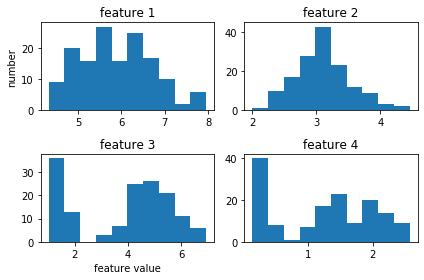

In [3]:
plt.subplot(2, 2, 1)
plt.hist(X[:,0]);
plt.ylabel('number')
plt.title('feature 1')
plt.subplot(2, 2, 2)
plt.hist(X[:,1]);
plt.title('feature 2')
plt.subplot(2, 2, 3)
plt.hist(X[:,2]);
plt.title('feature 3')
plt.xlabel('feature value')
plt.subplot(2, 2, 4)
plt.hist(X[:,3]);
plt.title('feature 4')
plt.tight_layout()
plt.show()

# Problem 1 Part (3)

In [4]:
print("feature one   mean is: {} standard deviation is {}".format(np.mean(X[:,0]),np.std(X[:,0])))
print("feature two   mean is: {} standard deviation is {}".format(np.mean(X[:,1]),np.std(X[:,1])))
print("feature three mean is: {} standard deviation is {}".format(np.mean(X[:,2]),np.std(X[:,2])))
print("feature four  mean is: {} standard deviation is {}".format(np.mean(X[:,3]),np.std(X[:,3])))

feature one   mean is: 5.900103764189188 standard deviation is 0.833402066774894
feature two   mean is: 3.098930916891892 standard deviation is 0.43629183800107685
feature three mean is: 3.8195548405405404 standard deviation is 1.7540571093439352
feature four  mean is: 1.2525554845945945 standard deviation is 0.7587724570263247


# Problem 1 Part (4)

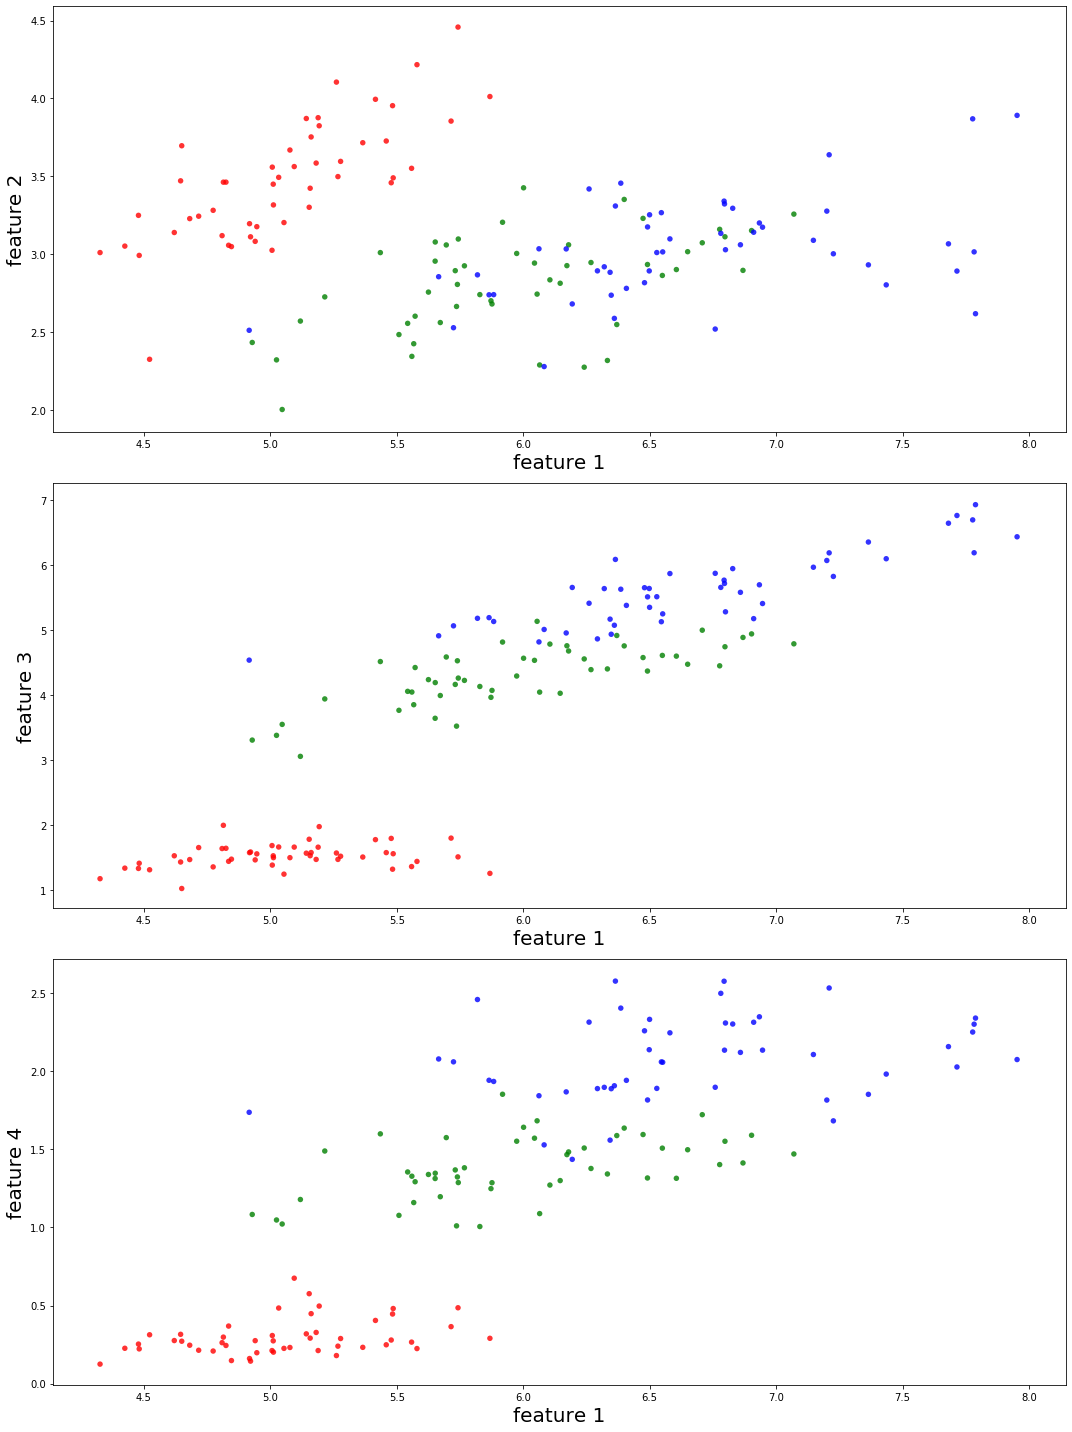

In [7]:
# create data
arry_list1 = (Y==0);
arry_list2 = (Y==1);
arry_list3 = (Y==2);
colors = ("red", "green", "blue");
groups = ("Y=0", "Y=1", "Y=2")
k      = 1;
plt.figure(figsize=(15,20))
for i in range(1,4):
    plt.subplot(3, 1, k)
    group1 = (X[arry_list1,0],X[arry_list1,i]);
    group2 = (X[arry_list2,0],X[arry_list2,i]);
    group3 = (X[arry_list3,0],X[arry_list3,i]);
        
    # Create plot
    plt.scatter(group1[0], group1[1], alpha=0.8, c=colors[0], edgecolors='none', s=30, label=groups[0])
    plt.scatter(group2[0], group2[1], alpha=0.8, c=colors[1], edgecolors='none', s=30, label=groups[1])
    plt.scatter(group3[0], group3[1], alpha=0.8, c=colors[2], edgecolors='none', s=30, label=groups[2])
        
    plt.xlabel('feature {}'.format(1), fontsize=20)
    plt.ylabel('feature {}'.format(i+1), fontsize=20)
        
    k +=1
        
plt.tight_layout()
plt.show()

# Problem 2 Part (1)

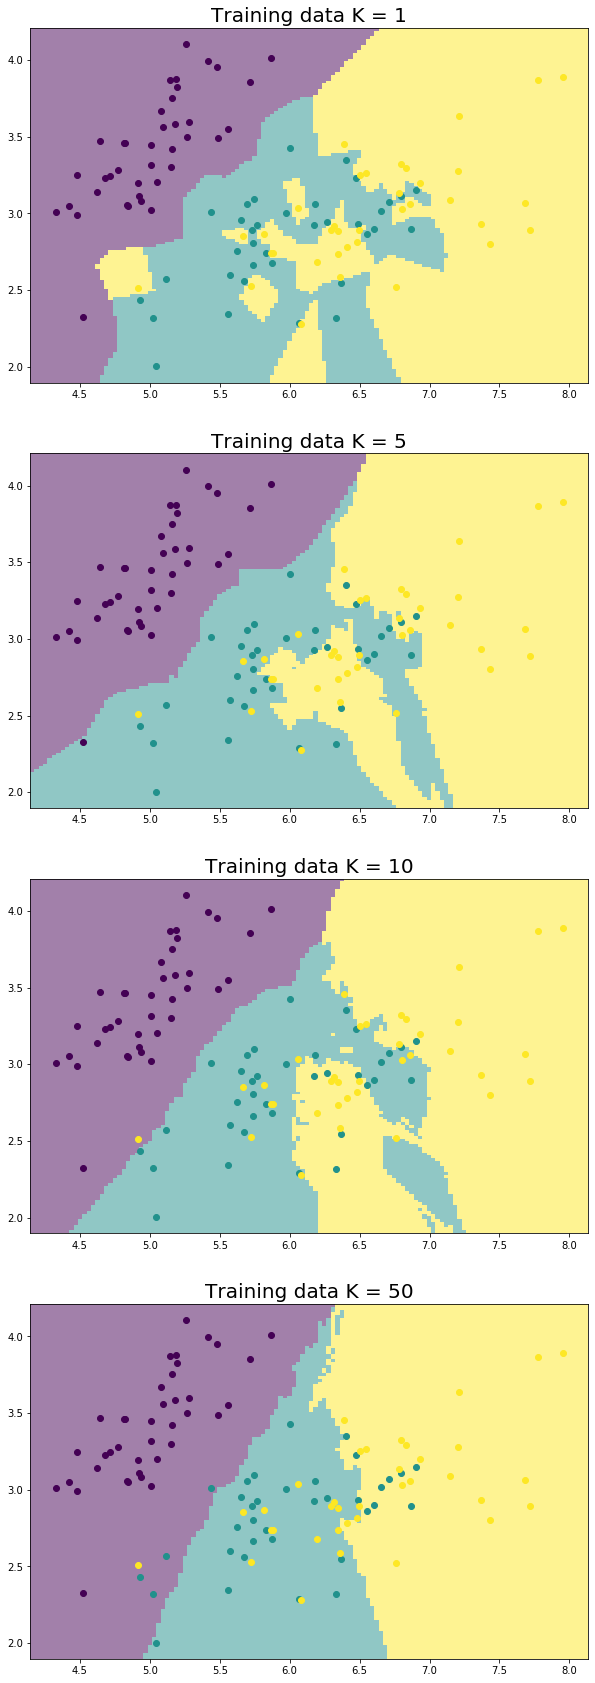

In [9]:
iris = np.genfromtxt("data/iris.txt",delimiter=None)
Y    = iris[:,-1];
X    = iris[:,0:2];
import mltools as ml
np.random.seed(0);
X,Y = ml.shuffleData(X,Y);
Xtr,Xva,Ytr,Yva = ml.splitData(X,Y,0.75);
knn = ml.knn.knnClassify();    # create the object and train it
K_lst = [1,5,10,50];
plt.figure(figsize=(10,30))
for K in K_lst:
    knn.train(Xtr,Ytr,K);          # K is integer e.g. 1 for nearst neighbor prediction
    YvaHat = knn.predict(Xva)      # get estimates of y for each data point in Xva
    plt.subplot(4, 1, K_lst.index(K)+1)
    ml.plotClassify2D(knn,Xtr,Ytr)
    plt.title('Training data K = {}'.format(K), fontsize=20)
    
# ml.plotClassify2D(knn,Xtr,Ytr)
# ml.plotClassify2D(None,Xtr,Ytr)

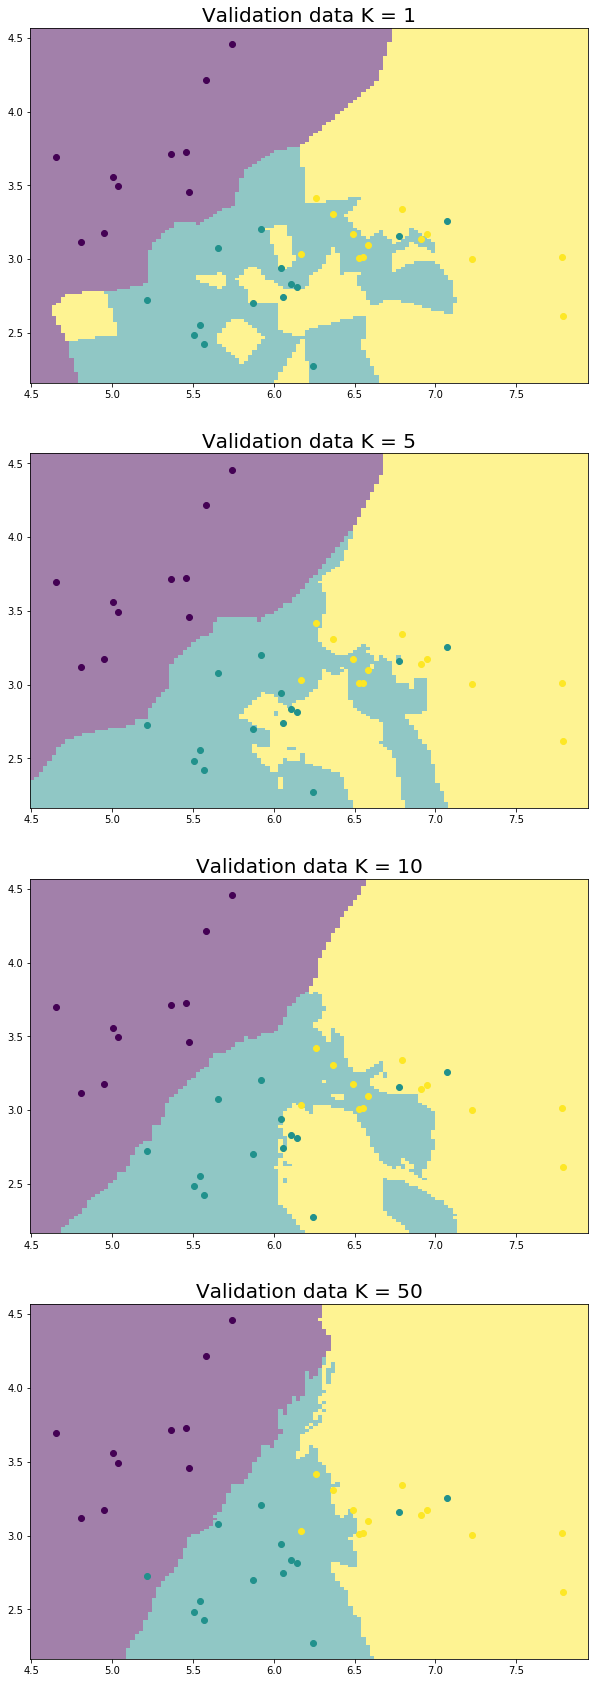

In [10]:
iris = np.genfromtxt("data/iris.txt",delimiter=None)
Y    = iris[:,-1];
X    = iris[:,0:2];
import mltools as ml
np.random.seed(0);
X,Y = ml.shuffleData(X,Y);
Xtr,Xva,Ytr,Yva = ml.splitData(X,Y,0.75);
knn = ml.knn.knnClassify();    # create the object and train it
K_lst = [1,5,10,50];
plt.figure(figsize=(10,30))
for K in K_lst:
    knn.train(Xtr,Ytr,K);          # K is integer e.g. 1 for nearst neighbor prediction
    YvaHat = knn.predict(Xva)      # get estimates of y for each data point in Xva
    plt.subplot(4, 1, K_lst.index(K)+1)
    ml.plotClassify2D(knn,Xva,Yva)
    plt.title('Validation data K = {}'.format(K), fontsize=20)

# Problem 2 Part (2)

the validation error rate for K = 1 is 0.2972972972972973
the validation error rate for K = 2 is 0.2972972972972973
the validation error rate for K = 5 is 0.2702702702702703
the validation error rate for K = 10 is 0.3783783783783784
the validation error rate for K = 50 is 0.13513513513513514
the validation error rate for K = 100 is 0.32432432432432434
the validation error rate for K = 200 is 0.7297297297297297


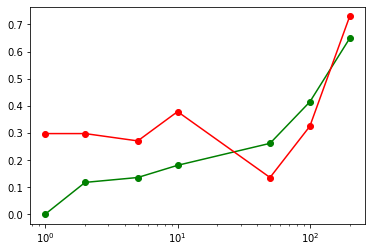

In [13]:
iris = np.genfromtxt("data/iris.txt",delimiter=None)
Y    = iris[:,-1];
X    = iris[:,0:2];
import mltools as ml
np.random.seed(0);
X,Y = ml.shuffleData(X,Y);
Xtr,Xva,Ytr,Yva = ml.splitData(X,Y,0.75);
knn = ml.knn.knnClassify();    # create the object and train it
K = [1,2,5,10,50,100,200];
errTrain = [None]*len(K);
errValid = [None]*len(K);
for i,k in enumerate(K):
    learner = ml.knn.knnClassify()
    learner.train(Xtr,Ytr,k)
    Yhat    = learner.predict(Xva)
    Yhat0   = learner.predict(Xtr)
    errTrain[i] = sum(Yhat0 != Ytr)/len(Ytr)
    errValid[i] = sum(Yhat  != Yva)/len(Yva)
plt.semilogx(K,errTrain,'go-', K,errValid,'ro-')
for i in range(len(K)):
    print("the validation error rate for K = {} is {}".format(K[i],errValid[i]))

Based on this plot, I will recommend K = 50 since the error rate of validation is smallest 

# Problem 2 Part (3)

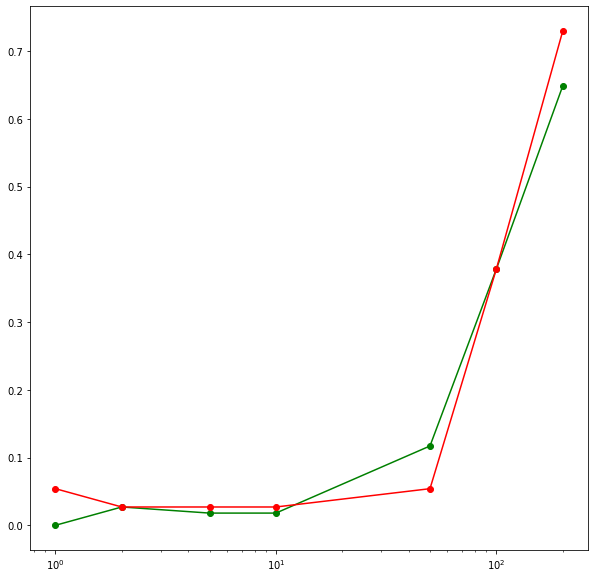

In [14]:
iris = np.genfromtxt("data/iris.txt",delimiter=None)
Y    = iris[:,-1];
X    = iris[:,0:-1];
import mltools as ml
np.random.seed(0);
X,Y = ml.shuffleData(X,Y);
Xtr,Xva,Ytr,Yva = ml.splitData(X,Y,0.75);
knn = ml.knn.knnClassify();    # create the object and train it
K = [1,2,5,10,50,100,200];
errTrain = [None]*len(K);
errValid = [None]*len(K);
plt.figure(figsize=(10,10))
for i,k in enumerate(K):
    learner = ml.knn.knnClassify()
    learner.train(Xtr,Ytr,k)
    Yhat    = learner.predict(Xva)
    Yhat0   = learner.predict(Xtr)
    errTrain[i] = sum(Yhat0 != Ytr)/len(Ytr)
    errValid[i] = sum(Yhat  != Yva)/len(Yva)
plt.semilogx(K,errTrain,'go-', K,errValid,'ro-')

Yes, the plots differ a lot. The error rates become much smaller if I use 4 features instead of 2. I will recommend using K = 2 since it both has similar small rate as K =5 and K = 10 but requires much fewer comupational cost.

# Problem 3 Part (1)

In [15]:
Data = np.array([[0,0,1,1,0,-1], 
                 [1,1,0,1,0,-1],
                 [0,1,1,1,1,-1],
                 [1,1,1,1,0,-1],
                 [0,1,0,0,0,-1],
                 [1,0,1,1,1, 1],
                 [0,0,1,0,0, 1],
                 [1,0,0,0,0, 1],
                 [1,0,1,1,0, 1],
                 [1,1,1,1,1,-1]]);

pY_lst    = np.array([sum(Data[:,-1]==-1)/len(Data[:,-1]),sum(Data[:,-1]==1)/len(Data[:,-1])])
Y0_index  = np.where(Data[:,-1]==-1)
Y1_index  = np.where(Data[:,-1]== 1)
pX_Y0_lst = [None]*(len(Data[1,:])-1)
pX_Y1_lst = [None]*(len(Data[1,:])-1)
for i in range(5):
    pX_Y0_lst[i] = sum(Data[:,i][Y0_index])/len(Data[:,i][Y0_index]) 
    pX_Y1_lst[i] = sum(Data[:,i][Y1_index])/len(Data[:,i][Y1_index]) 

In [35]:
print('P(y=-1)={} P(y=1)={}'.format(pY_lst[0],pY_lst[1]))
print('from i=1:5 \n P(Xi=1|Y=-1)={}'.format(pX_Y0_lst)) 
print(' P(Xi=0|Y=-1)={}'.format(np.array([1,1,1,1,1])-pX_Y0_lst)) 
print(' P(Xi=1|Y= 1)={}'.format(pX_Y1_lst)) 
print(' P(Xi=0|Y= 1)={}'.format(np.array([1,1,1,1,1])-pX_Y1_lst)) 
# from tabulate import tabulate

P(y=-1)=0.6 P(y=1)=0.4
from i=1:5 
 P(Xi=1|Y=-1)=[0.5, 0.8333333333333334, 0.6666666666666666, 0.8333333333333334, 0.3333333333333333]
 P(Xi=0|Y=-1)=[0.5        0.16666667 0.33333333 0.16666667 0.66666667]
 P(Xi=1|Y= 1)=[0.75, 0.0, 0.75, 0.5, 0.25]
 P(Xi=0|Y= 1)=[0.25 1.   0.25 0.5  0.75]


# Problem 3 Part (2)

Predict  x = (0 0 0 0 0) in class Y = 1
Predict  x = (1,1,0,1,0) in class Y = 0

# Problem 3 Part (3)

In [38]:
x1 = np.array([0,0,0,0,0])
p1 = pY_lst[1]
p0 = pY_lst[0]
for i,k in enumerate(x1):
    if k == 0: 
        p1 *= 1-pX_Y1_lst[i]
        p0 *= 1-pX_Y0_lst[i]
    else:
        p1 *= pX_Y1_lst[i] 
        p0 *= pX_Y0_lst[i]
p1 = p1/(p1+p0)
print("prediction for Y =1 for x = (0 0 0 0 0) is {}".format(p1))
print("Thus, predict Y =1")

prediction for Y =1 for x = (0 0 0 0 0) is 0.8350515463917526
Thus, predict Y =1


In [39]:
x2 = np.array([1,1,0,1,0])
p1 = pY_lst[1]
p0 = pY_lst[0]
for i,k in enumerate(x2):
    if k == 0: 
        p1 *= 1-pX_Y1_lst[i]
        p0 *= 1-pX_Y0_lst[i]
    else:
        p1 *= pX_Y1_lst[i] 
        p0 *= pX_Y0_lst[i]
p1 = p1/(p1+p0)
print("prediction for Y =1 for x = (1 1 0 1 0) is {}".format(p1))
print("Thus, predict Y =0")

prediction for Y =1 for x = (1 1 0 1 0) is 0.0
Thus, predict Y =0


#  Problem 3 Part (4)

 If we use joint probablity of the features x instead of the conditional independencies. By total law of probability, the computational complexity may increase dramtically in some cases since each feature may be depend on other features and lead to more cost on conditional probability.Moreover, weson;t have the data for that. Suppose in joint probablity p(X,Y) has n features, each feature Xi has d possible values and Y has c classes. Then P(X,Y) consistant of c*d^n-1 probabilities. but for Naive Bayes only (c-1)+c*n(d-1) free parameters

# Problem 3 Part (5)

We don't need to retrain the model. We can just fix our posterior by take out the probablity of p(X1=(i)|Y=(j)) where i = {0,1}, Y ={0,1}. Then, we can get a new posterior to predict.

# Problem 4 Part (1)

In [40]:
iris = np.genfromtxt("data/iris.txt",delimiter=None)
Y    = iris[:,-1];
X    = iris[:,0:2];
import mltools as ml
np.random.seed(0);
X,Y = ml.shuffleData(X,Y);
Xtr,Xva,Ytr,Yva = ml.splitData(X,Y,0.75);

In [46]:
mu00 = np.mean(Xtr[Ytr == 0,0])
mu01 = np.mean(Xtr[Ytr == 0,1])
cov0 = np.cov(Xtr[Ytr == 0,0],Xtr[Ytr == 0,1])
mu10 = np.mean(Xtr[Ytr == 1,0])
mu11 = np.mean(Xtr[Ytr == 1,1])
cov1 = np.cov(Xtr[Ytr == 1,0],Xtr[Ytr == 1,1])
mu20 = np.mean(Xtr[Ytr == 2,0])
mu21 = np.mean(Xtr[Ytr == 2,1])
cov2 = np.cov(Xtr[Ytr == 2,0],Xtr[Ytr == 2,1])
print("traing data class 1: mean is {} {} and the cov is {}".format(mu00,mu01,cov0))
print("traing data class 2: mean is {} {} and the cov is {}".format(mu10,mu11,cov1))
print("traing data class 3: mean is {} {} and the cov is {}".format(mu20,mu21,cov2))

traing data class 1: mean is 5.013727684615386 3.4183156794871796 and the cov is [[0.12727412 0.09757339]
 [0.09757339 0.13485744]]
traing data class 2: mean is 5.987868791666666 2.818109777777777 and the cov is [[0.28925977 0.09354616]
 [0.09354616 0.10290638]]
traing data class 3: mean is 6.609340627777778 2.9922202888888894 and the cov is [[0.44710413 0.15036367]
 [0.15036367 0.13007674]]


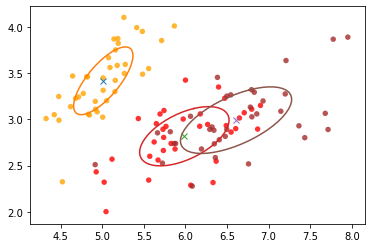

In [48]:
plt.scatter(Xtr[Ytr == 0,0],Xtr[Ytr == 0,1] , alpha=0.8, c='orange', edgecolors='none', s=30, label='Y =0')
plt.scatter(Xtr[Ytr == 1,0],Xtr[Ytr == 1,1] , alpha=0.8, c='r', edgecolors='none', s=30, label='Y =1')
plt.scatter(Xtr[Ytr == 2,0],Xtr[Ytr == 2,1] , alpha=0.8, c='brown', edgecolors='none', s=30, label='Y =2')
ml.plot.plotGauss2D([mu00,mu01],cov0)
ml.plot.plotGauss2D([mu10,mu11],cov1)
ml.plot.plotGauss2D([mu20,mu21],cov2)

#  Problem 4 Part (2)

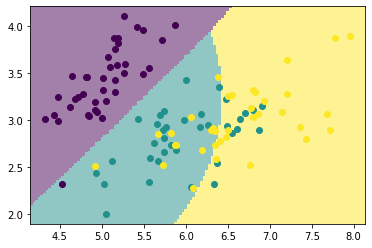

In [43]:
bc = ml.bayes.gaussClassify(Xtr,Ytr)
ml.plot.plotClassify2D(bc,Xtr,Ytr)

# Problem 4 Part (3)

In [44]:
# plt.figure(figsize=(10,10))
Yhat    = bc.predict(Xva)
Yhat0   = bc.predict(Xtr)
errTrain = sum(Yhat0 != Ytr)/len(Ytr)
errValid = sum(Yhat  != Yva)/len(Yva)

In [45]:
print("error rate for training   data is {}".format(errTrain))
print("error rate for validation data is {}".format(errValid))

error rate for training   data is 0.23423423423423423
error rate for validation data is 0.16216216216216217


# # Problem 5 Part (1)

I collarborted with Yang Jiao for this homework for problem 3 part 5 whether we should retrain the model and finsihed by myself. 